# Projeto de classificação em machine learning

## Importando dados

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('customer.csv')

dataset = dataset.drop(['Unnamed: 0'], axis = 1)

dataset.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## Tratando dados

In [3]:
traducao = {'Sim' : 1, 'Nao' : 0}

dataset_modificado = dataset[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao)

dataset_modificado.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [4]:
dataset_dummies = pd.get_dummies(dataset.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis = 1))

dataset_dummies.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [5]:
dataset_final = pd.concat([dataset_modificado, dataset_dummies], axis = 1)

dataset_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


## Balanceamento de dados

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='Churn', ylabel='count'>

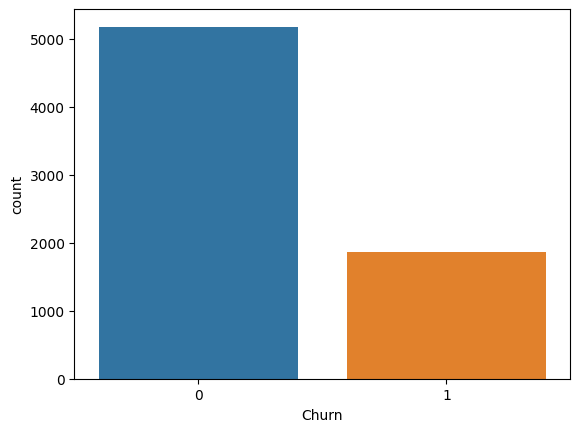

In [7]:
sns.countplot(x = 'Churn', data = dataset_final)

In [8]:
dataset_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## Divisão entre inputs e outputs

In [9]:
x = dataset_final.drop(['Churn'], axis = 1)
y = dataset_final['Churn']

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
normalizador = StandardScaler()

x_normalizado = normalizador.fit_transform(x)
x_normalizado

array([[ 1.03453023, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 , -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
        -0.54480692,  1.88720123]])

## Implementando o modelo KNeighborsClassifier

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [15]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [16]:
knn_predict = knn.predict(xtest)

accuracy_knn = knn.score(xtest, ytest)

print('Acurácia do modelo KNeighborsClassifier : %.2f%%' % (accuracy_knn * 100))

Acurácia do modelo KNeighborsClassifier : 76.95%


## Implementando o modelo BernoulliNB

In [17]:
from sklearn.naive_bayes import BernoulliNB

In [18]:
# Binarize é a mediana do xtrain

bnb = BernoulliNB()

In [19]:
bnb.fit(xtrain, ytrain)

BernoulliNB()

In [20]:
bnb_predict = bnb.predict(xtest)

accuracy_bnb = bnb.score(xtest, ytest)

print('Acurácia do modelo BernoulliNB : %.2f%%' % (accuracy_bnb * 100))

Acurácia do modelo BernoulliNB : 72.03%


## Implementando o modelo de árvore de decisão

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=8173)

In [23]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=8173)

In [24]:
dtc_predict = dtc.predict(xtest)

accuracy_dtc = dtc.score(xtest, ytest)

print('Acurácia do modelo DecisionTreeClassifier : %.2f%%' % (accuracy_dtc * 100))

Acurácia do modelo DecisionTreeClassifier : 72.36%


## Matriz de confusão

In [25]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

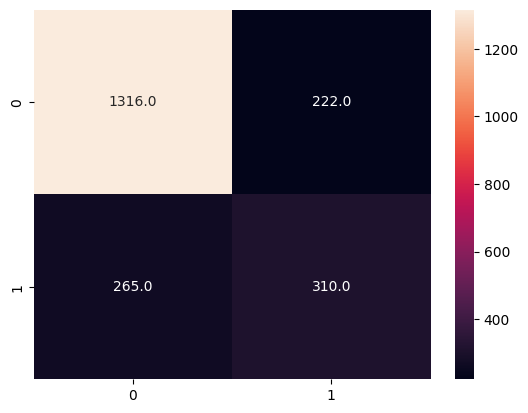

In [26]:
matriz_knn = confusion_matrix(ytest, knn_predict)

sns.heatmap(matriz_knn, annot = True, fmt = '.1f')

<AxesSubplot:>

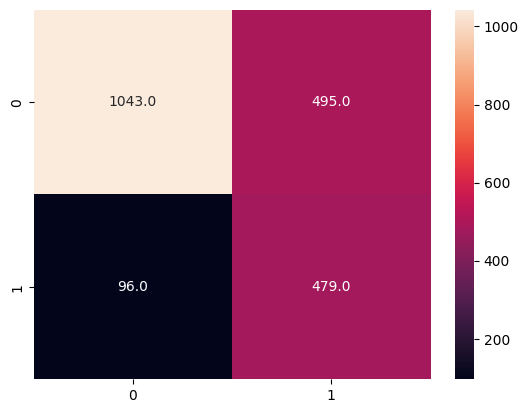

In [27]:
matriz_bnb = confusion_matrix(ytest, bnb_predict)

sns.heatmap(matriz_bnb, annot = True, fmt = '.1f')

<AxesSubplot:>

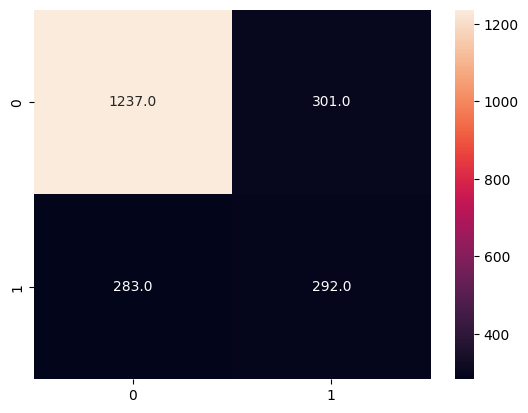

In [28]:
matriz_dtc = confusion_matrix(ytest, dtc_predict)

sns.heatmap(matriz_dtc, annot = True, fmt = '.1f')

## Acurácia e precisão

In [29]:
from sklearn.metrics import precision_score

In [30]:
knn_precision = precision_score(ytest, knn_predict)

bnb_precision = precision_score(ytest, bnb_predict)

dtc_precision = precision_score(ytest, dtc_predict)

In [31]:
print(f'KNeighborsClassifier : {accuracy_knn} ; {knn_precision}')
print(f'BernoulliNB : {accuracy_bnb} ; {bnb_precision}')
print(f'DecisionTreeClassifier : {accuracy_dtc} ; {dtc_precision}')

KNeighborsClassifier : 0.7695220066256507 ; 0.5827067669172933
BernoulliNB : 0.7203028868906768 ; 0.4917864476386037
DecisionTreeClassifier : 0.7236157122574538 ; 0.4924114671163575
